## Misura dell'Efficienza dei Rivelatori (updated to 22th November 2024)
## OUTDATED : THESE DATA WERE WRONG
## DO NOT USE THEM !!!

Dimensioni rivelatori: 



Questo notebook contiene la misura dell'efficienza dei tre scintillatori calcolata sfruttando le coincidenze doppie e triple mediante la formula:

$\epsilon_{riv} = \frac{N_{triple}}{N_{doppie}}$



Tensioni: 

I conteggi vengono effettuati ogni 1 minuto.

$\Delta t$ = 50 $ns$


* N.B.: Non si è tenuto conto delle coincidenze accidentali


### Esempio: Efficienza del Primo Rivelatore

Sfruttiamo le coincidenze triple. Le coincidenze doppie sono relative al secondo e al terzo rivelatore: 




$N_{triple} = N_{\mu} \, \epsilon_1 \, \epsilon_2 \, \epsilon_3$,

$N_{doppie} = N_{\mu}\, \epsilon_2 \,\epsilon_3$ $=$ $N_{2,3} $ 

$\Rightarrow$ $\epsilon_1 = \frac{N_{triple}}{N_{2,3}} $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# LateX font:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

### Crea i DataFrames con tutte le coincidenze doppie e triple

## Studio dell'Efficienza dello Scintillatore 1

* Voltaggi degli Scintillatori 2 e 3:  $V = 1050 \,V$
* Threshold degli Scintillatori 2 e 3:  $Th = 70 \,meV$


Variamo il voltaggio e la threshold per trovare il punto in cui l'efficienza dello Scintillatore 1 è massima.

## V = 900 V

In [120]:
# Rivelatore 1 : le doppie sono 2,3

data_1 = {
        'V [V]': np.full(3, 900),
        'Th [meV]' : [0, 5, 10, ],
    
        'N_singole_1': [9370, 1303, 373,],
        'N_singole_2': [1660, 1679, 1622,],
        'N_singole_3': [1740, 1722, 1726,],
    
        'N_doppie_12' : [1369, 820, 264,],
        'N_doppie_13' : [1391, 826, 276, ],
        'N_doppie_23' : [1148, 1192, 1114],
    
        'N_triple' : [1136, 693, 207],
}
df_1= pd.DataFrame(data_1)

In [121]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_1['N_singole_1']/(60) * df_1['N_singole_2']/(60) * delta_t
N_doppie_acc_13 = df_1['N_singole_1']/(60) * df_1['N_singole_3']/(60) * delta_t
N_doppie_acc_23 = df_1['N_singole_2']/(60) * df_1['N_singole_3']/(60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_1['N_singole_1']/(60) * df_1['N_singole_2']/(60) * df_1['N_singole_3']/(60) * delta_t * delta_t

In [122]:
df_acc = pd.DataFrame({
    'N_acc_12': N_doppie_acc_12,
    'N_acc_13': N_doppie_acc_13,
    'N_acc_23': N_doppie_acc_23,
    'N_acc': N_triple_acc
})

df_acc

,N_acc_12,N_acc_13,N_acc_23,N_acc
0,0.000216,0.000226,0.000040,3.132443e-10
1,0.000030,0.000031,0.000040,4.360281e-11
2,0.000008,0.000009,0.000039,1.208612e-11


In [123]:
# Calcola e aggiungi le efficienze ai rispettivi DataFrames 

df_1['epsilon_1'] = df_1['N_triple']/df_1['N_doppie_23']
df_1['sigma_epsilon_1'] = np.sqrt(df_1['epsilon_1']/df_1['N_doppie_23'] * (1 - df_1['epsilon_1']))


In [124]:
# Crea degli array con i valori delle efficienze per creare
# un DataFrame separato

epsilon_1 = df_1['epsilon_1']
sigma_epsilon_1 = df_1['sigma_epsilon_1']

In [125]:
# DataFrame delle efficienze 

df_eff = pd.DataFrame({
    'epsilon_1' : epsilon_1,
    'sigma_epsilon_1' : sigma_epsilon_1,
    
})

In [126]:
df_eff

,epsilon_1,sigma_epsilon_1
0,0.989547,0.003002
1,0.581376,0.014289
2,0.185817,0.011654


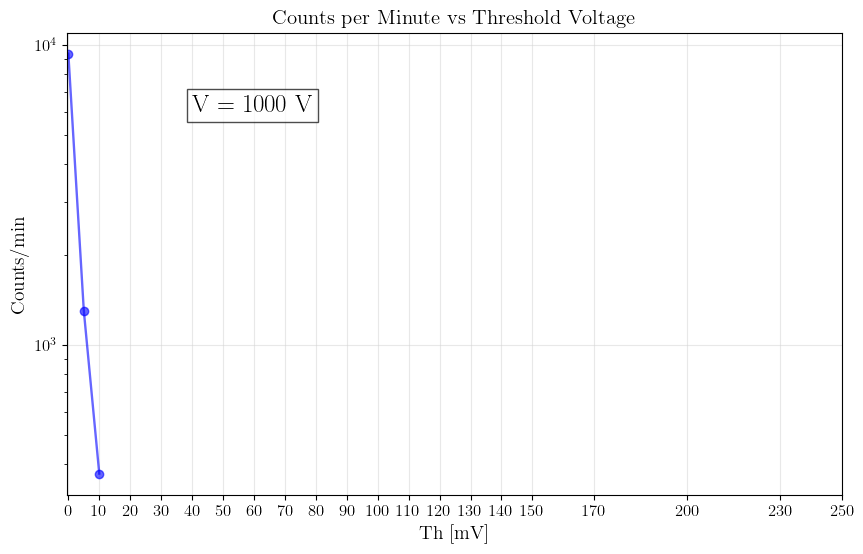

In [127]:
plt.figure(figsize=(10, 6))

plt.plot(df_1['Th [meV]'], df_1['N_singole_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 170, 200, 230, 250], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
plt.text(40, 6000, 'V = 900 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

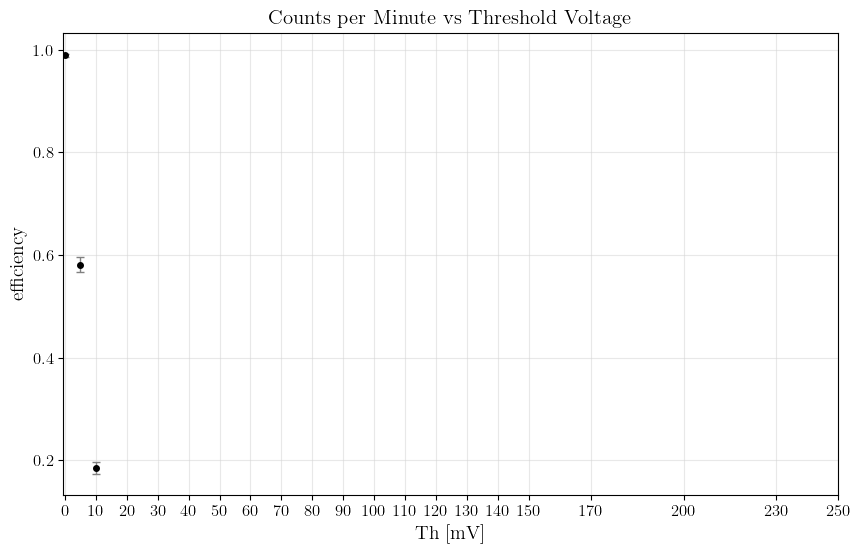

In [128]:
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(df_1['Th [meV]'], df_1['epsilon_1'], markersize = 4,
             yerr=df_1['sigma_epsilon_1'],   # Error bar values
             fmt='o', linewidth=0, color='black',  # Marker and line settings
             ecolor='gray', elinewidth=1, capsize=3)  # Error bar style

plt.title('Efficiency vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('efficiency', fontsize=14)
plt.grid(True, color='lightgray', alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 170, 200, 230, 250], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot:
# plt.text(40, 60000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()


## V = 1200 V

In [199]:
# Rivelatore 1 : le doppie sono 2,3

data_2 = {
        'V [V]': np.full(9, 1200),
        'Th [meV]' : [0, 5, 10, 15, 20, 25, 30, 40, 80],
    
        'N_singole_1': [66402, 28798, 19348, 13119, 8835, 6687, 5172, 3460, 870, ],
        'N_singole_2': [1536, 1621, 1575, 1640, 1610, 1656, 1679, 1737, 1597, ],
        'N_singole_3': [1688, 1823, 1757, 1723, 1714, 1800, 1781, 1862, 1723, ],
    
        'N_doppie_12' : [1279, 1334,  1324, 1368, 1288, 1353, 1303, 1271, 520, ],
        'N_doppie_13' : [1378, 1438, 1401, 1380, 1363, 1427, 1343, 1291, 529,],
        'N_doppie_23' : [1078, 1149, 1122, 1150, 1120, 1194, 1162, 1218, 1128,],
    
        'N_triple' : [1071, 1142, 1113, 1139, 1099, 1162, 1105, 1052, 397],
}
df_2= pd.DataFrame(data_2)

In [200]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_2['N_singole_1']/(60) * df_2['N_singole_2']/(60) * delta_t
N_doppie_acc_13 = df_2['N_singole_1']/(60) * df_2['N_singole_3']/(60) * delta_t
N_doppie_acc_23 = df_2['N_singole_2']/(60) * df_2['N_singole_3']/(60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_2['N_singole_1']/(60) * df_2['N_singole_2']/(60) * df_2['N_singole_3']/(60) * delta_t * delta_t

In [201]:
df_acc = pd.DataFrame({
    'N_acc_12': N_doppie_acc_12,
    'N_acc_13': N_doppie_acc_13,
    'N_acc_23': N_doppie_acc_23,
    'N_acc': N_triple_acc
})

df_acc

,N_acc_12,N_acc_13,N_acc_23,N_acc
0,0.001417,0.001557,0.000036,1.992650e-09
1,0.000648,0.000729,0.000041,9.849593e-10
2,0.000423,0.000472,0.000038,6.196902e-10
3,0.000299,0.000314,0.000039,4.290581e-10
4,0.000198,0.000210,0.000038,2.821821e-10
5,0.000154,0.000167,0.000041,2.307015e-10
6,0.000121,0.000128,0.000042,1.790026e-10
7,0.000083,0.000089,0.000045,1.295215e-10
8,0.000019,0.000021,0.000038,2.770740e-11


In [202]:
# Calcola e aggiungi le efficienze ai rispettivi DataFrames 

df_2['epsilon_1'] = df_2['N_triple']/df_2['N_doppie_23']
df_2['sigma_epsilon_1'] = np.sqrt(df_2['epsilon_1']/df_2['N_doppie_23'] * (1 - df_2['epsilon_1']))


In [203]:
# Crea degli array con i valori delle efficienze per creare
# un DataFrame separato

epsilon_1 = df_2['epsilon_1']
sigma_epsilon_1 = df_2['sigma_epsilon_1']

In [204]:
# DataFrame delle efficienze 

df_eff = pd.DataFrame({
    'epsilon_1' : epsilon_1,
    'sigma_epsilon_1' : sigma_epsilon_1,
    
})

In [205]:
df_eff

,epsilon_1,sigma_epsilon_1
0,0.993506,0.002446
1,0.993908,0.002296
2,0.991979,0.002663
3,0.990435,0.002870
4,0.981250,0.004053
5,0.973199,0.004674
6,0.950947,0.006336
7,0.863711,0.009831
8,0.351950,0.014220


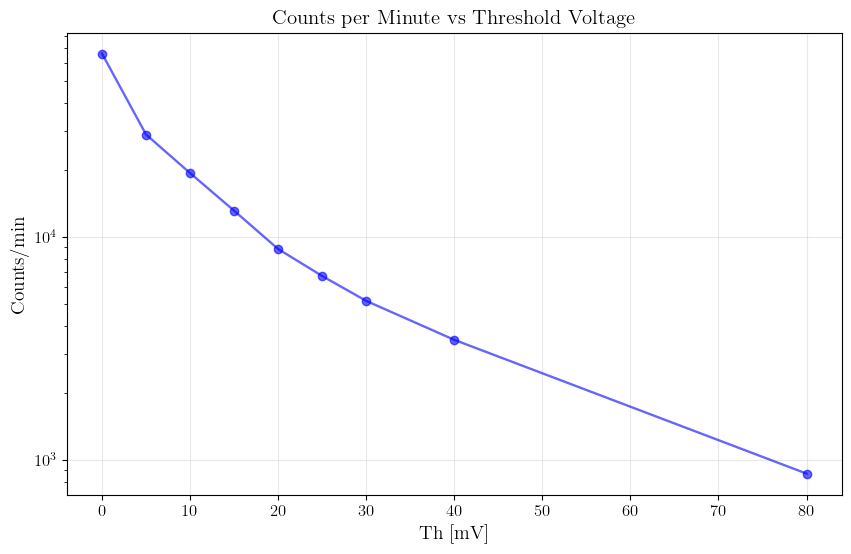

In [206]:
plt.figure(figsize=(10, 6))

plt.plot(df_2['Th [meV]'], df_2['N_singole_1'], linestyle='-', marker='o', linewidth=1.7,color='b', alpha=0.6) # add "marker = 'o'" if you need the markers

plt.title('Counts per Minute vs Threshold Voltage',fontsize=15)
plt.xlabel('Th [mV]',fontsize=14)
plt.ylabel('Counts/min',fontsize=14)
plt.yscale('log')
plt.grid(True, color='lightgray',alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)

# Add the fixed value of V to the plot :
#plt.text(40, 6000, 'V = 1200 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

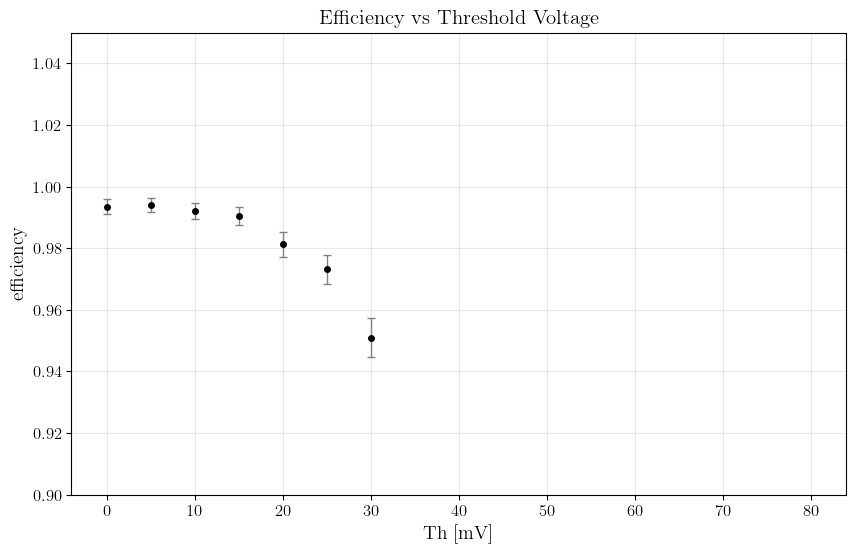

In [207]:
plt.figure(figsize=(10, 6))

# Plot with error bars
plt.errorbar(df_2['Th [meV]'], df_2['epsilon_1'], markersize = 4,
             yerr=df_2['sigma_epsilon_1'],   # Error bar values
             fmt='o', linewidth=0, color='black',  # Marker and line settings
             ecolor='gray', elinewidth=1, capsize=3)  # Error bar style

plt.title('Efficiency vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('efficiency', fontsize=14)
plt.grid(True, color='lightgray', alpha=0.5)

plt.xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=12)
# Uncomment if needed (comment the previous line): 
# plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
plt.yticks(fontsize=12)
plt.ylim(0.9, 1.05)

# Add the fixed value of V to the plot:
# plt.text(40, 60000, 'V = 1000 V', fontsize=18, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()

## V = 1150 V

In [ ]:
# Rivelatore 1 : le doppie sono 2,3

data_3 = {
        'V [V]': np.full(1, 1150),
        'Th [meV]' : [0, ],
    
        'N_singole_1': [],
        'N_singole_2': [],
        'N_singole_3': [ ],
    
        'N_doppie_12' : [ ],
        'N_doppie_13' : [],
        'N_doppie_23' : []
    
        'N_triple' : [],
}
df_3 = pd.DataFrame(data_3)

In [ ]:
# Doppie accidentali : 
delta_t = 50*10**(-9) # s

N_doppie_acc_12 = df_3['N_singole_1']/(60) * df_3['N_singole_2']/(60) * delta_t
N_doppie_acc_13 = df_3['N_singole_1']/(60) * df_3['N_singole_3']/(60) * delta_t
N_doppie_acc_23 = df_3['N_singole_2']/(60) * df_3['N_singole_3']/(60) * delta_t

# Coincidenze triple : 
N_triple_acc = df_3['N_singole_1']/(60) * df_3['N_singole_2']/(60) * df_3['N_singole_3']/(60) * delta_t * delta_t